In [3]:
# Import libraries
import pandas as pd
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plot style (use a built-in Matplotlib style or Seaborn)
plt.style.use('seaborn-v0_8')  # Updated style (requires seaborn installed)

# Load the processed news dataset from Task 1
news_data_path = '../data/processed_data/financial_news_eda_processed.csv'
try:
    news_df = pd.read_csv(news_data_path)
    print("News data loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {news_data_path}")

# Convert date column to datetime and remove timezone info for simplicity
news_df['date'] = pd.to_datetime(news_df['date']).dt.tz_localize(None)

# Extract unique stock tickers
unique_stocks = news_df['stock'].unique()
print(f"Unique stocks: {len(unique_stocks)}")

# For this example, focus on one stock (e.g., 'A' for Agilent Technologies)
stock_ticker = 'A'

# Define date range based on news data (2020, as per Task 1 output)
start_date = '2020-01-01'
end_date = '2020-12-31'

# Download stock price data using yfinance
stock_data = yf.download(stock_ticker, start=start_date, end=end_date, progress=False)
print(f"Stock data for {stock_ticker} loaded successfully!")

# Reset index to make 'Date' a column
stock_data.reset_index(inplace=True)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Display first few rows of stock data
print("\nFirst 5 rows of stock data:")
print(stock_data.head())

# Save stock data for future use
stock_data.to_csv(f'../data/processed_data/{stock_ticker}_stock_data.csv', index=False)
print(f"Stock data saved to: ../data/processed_data/{stock_ticker}_stock_data.csv")

News data loaded successfully!
Unique stocks: 6204


C:\Users\redie\AppData\Local\Temp\ipykernel_18304\2468544432.py:35: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_ticker, start=start_date, end=end_date, progress=False)


Stock data for A loaded successfully!

First 5 rows of stock data:
Price        Date      Close       High        Low       Open   Volume
Ticker                     A          A          A          A        A
0      2020-01-02  82.885246  83.270985  82.161989  82.837034  1410500
1      2020-01-03  81.554443  82.287346  81.486940  81.650876  1118300
2      2020-01-06  81.795563  81.795563  80.619063  81.004802  1993200
3      2020-01-07  82.046265  82.219847  80.946915  80.966198  1684700
4      2020-01-08  82.856323  83.386715  82.161995  82.894898  1847600
Stock data saved to: ../data/processed_data/A_stock_data.csv


In [5]:
## Calculate Technical Indicators with TA-Lib

# Extract Close prices as a NumPy array for ticker 'A'
close_prices = stock_data['Close']['A'].to_numpy()

# Calculate Simple Moving Average (SMA)
stock_data['SMA_20'] = talib.SMA(close_prices, timeperiod=20)
stock_data['SMA_50'] = talib.SMA(close_prices, timeperiod=50)

# Calculate Exponential Moving Average (EMA)
stock_data['EMA_20'] = talib.EMA(close_prices, timeperiod=20)

# Calculate Relative Strength Index (RSI)
stock_data['RSI'] = talib.RSI(close_prices, timeperiod=14)

# Calculate MACD
stock_data['MACD'], stock_data['MACD_Signal'], stock_data['MACD_Hist'] = talib.MACD(
    close_prices, fastperiod=12, slowperiod=26, signalperiod=9
)

# Display first few rows with indicators
print("\nStock data with technical indicators:")
print(stock_data[['Date', 'Close', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']].head())

# Save enriched stock data
stock_data.to_csv(f'../data/processed_data/{stock_ticker}_stock_data_with_indicators.csv', index=False)
print(f"Enriched stock data saved to: ../data/processed_data/{stock_ticker}_stock_data_with_indicators.csv")


Stock data with technical indicators:
Price        Date      Close SMA_20 SMA_50 EMA_20 RSI MACD MACD_Signal  \
Ticker                     A                                             
0      2020-01-02  82.885246    NaN    NaN    NaN NaN  NaN         NaN   
1      2020-01-03  81.554443    NaN    NaN    NaN NaN  NaN         NaN   
2      2020-01-06  81.795563    NaN    NaN    NaN NaN  NaN         NaN   
3      2020-01-07  82.046265    NaN    NaN    NaN NaN  NaN         NaN   
4      2020-01-08  82.856323    NaN    NaN    NaN NaN  NaN         NaN   

Price  MACD_Hist  
Ticker            
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
Enriched stock data saved to: ../data/processed_data/A_stock_data_with_indicators.csv


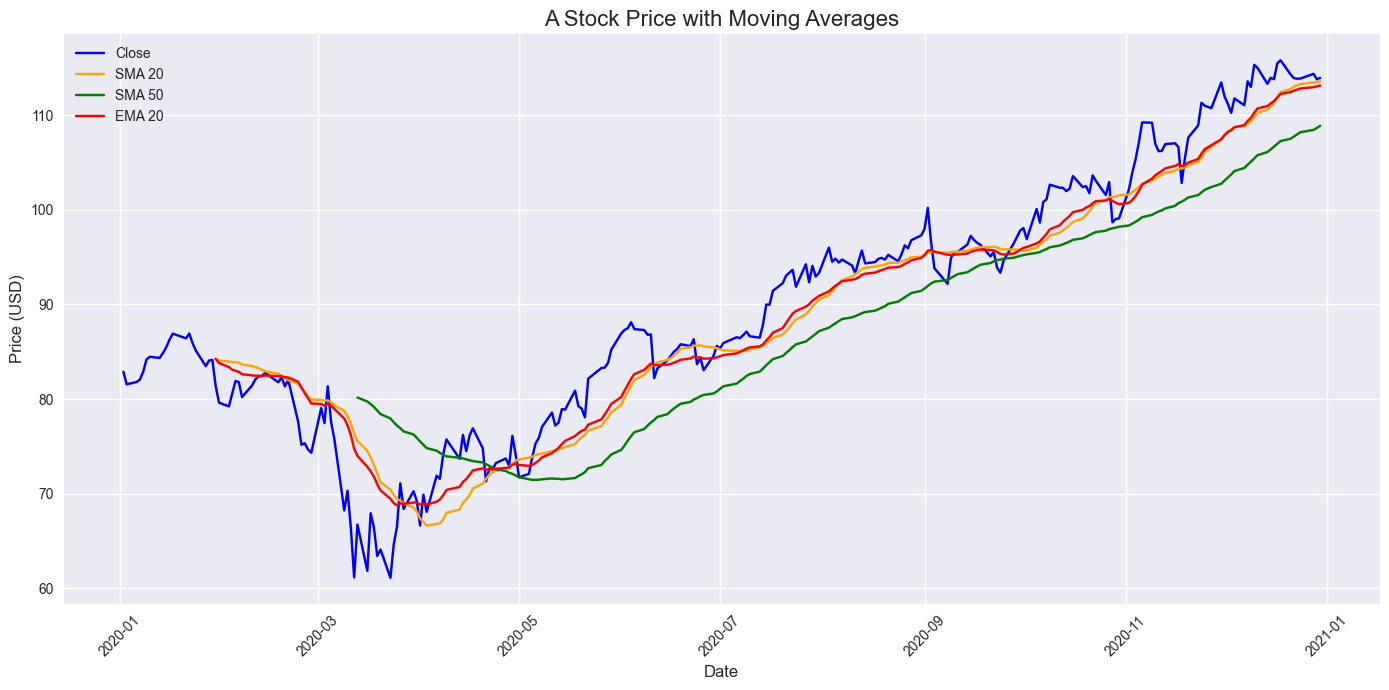

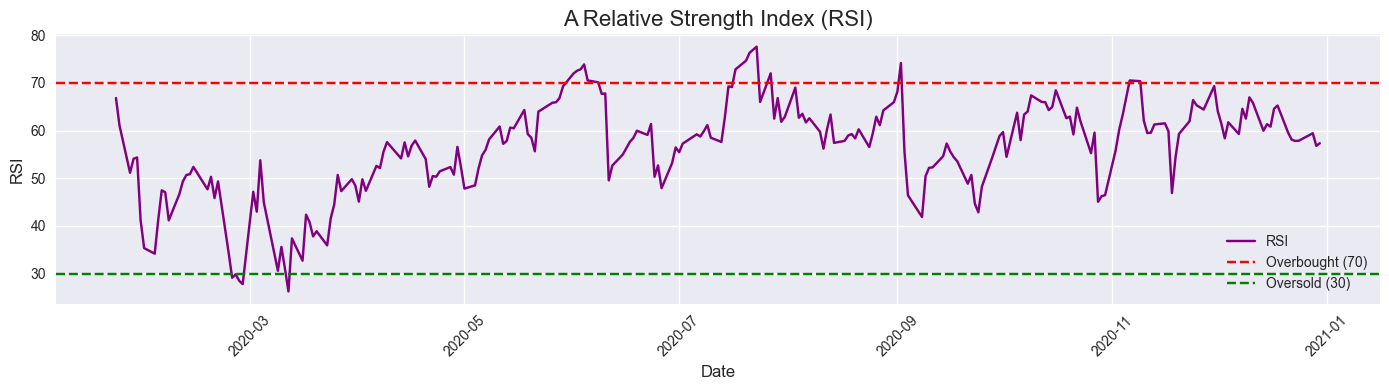

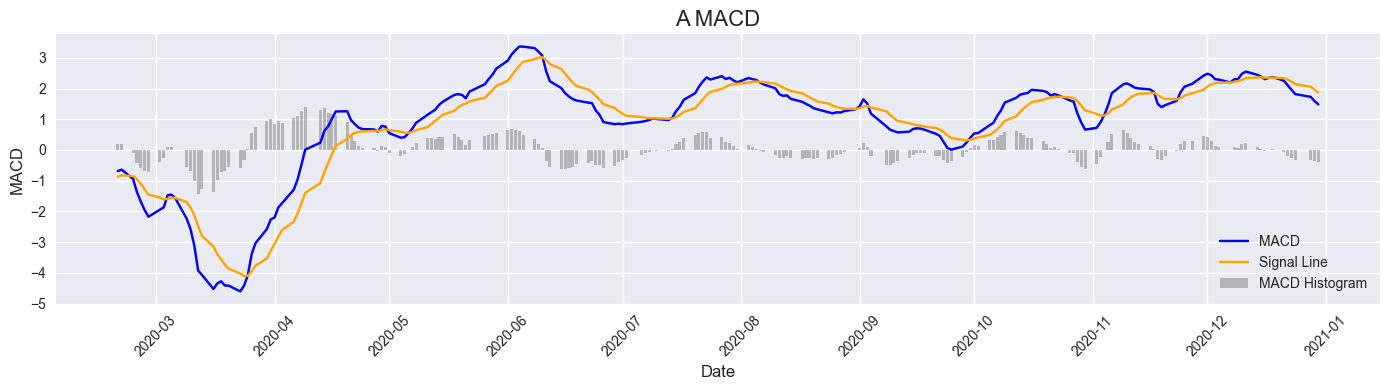

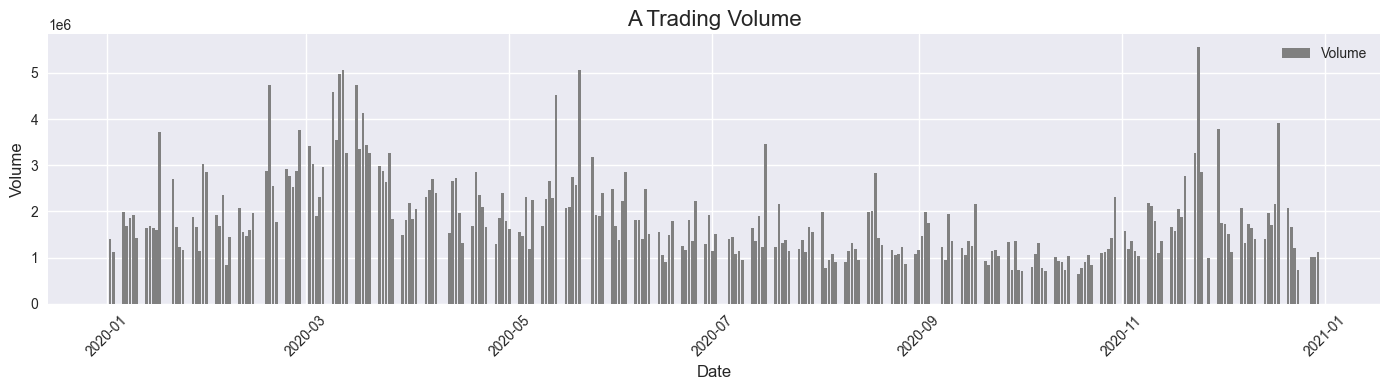

In [6]:
## Visualize Stock Price and Technical Indicators

# Create figures directory if it doesn't exist
import os
if not os.path.exists('../figures'):
    os.makedirs('../figures')

# Plot 1: Stock Price with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Close']['A'], label='Close', color='blue')
plt.plot(stock_data['Date'], stock_data['SMA_20'], label='SMA 20', color='orange')
plt.plot(stock_data['Date'], stock_data['SMA_50'], label='SMA 50', color='green')
plt.plot(stock_data['Date'], stock_data['EMA_20'], label='EMA 20', color='red')
plt.title(f'{stock_ticker} Stock Price with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../figures/{stock_ticker}_price_ma.png')
plt.show()

# Plot 2: RSI
plt.figure(figsize=(14, 4))
plt.plot(stock_data['Date'], stock_data['RSI'], label='RSI', color='purple')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title(f'{stock_ticker} Relative Strength Index (RSI)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('RSI', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../figures/{stock_ticker}_rsi.png')
plt.show()

# Plot 3: MACD
plt.figure(figsize=(14, 4))
plt.plot(stock_data['Date'], stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['Date'], stock_data['MACD_Signal'], label='Signal Line', color='orange')
plt.bar(stock_data['Date'], stock_data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title(f'{stock_ticker} MACD', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('MACD', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../figures/{stock_ticker}_macd.png')
plt.show()

# Plot 4: Volume
plt.figure(figsize=(14, 4))
plt.bar(stock_data['Date'], stock_data['Volume']['A'], label='Volume', color='gray')
plt.title(f'{stock_ticker} Trading Volume', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../figures/{stock_ticker}_volume.png')
plt.show()

In [11]:
print(stock_data.columns)
print(stock_data['Date'].dtype)
print(stock_data['Date'].head())


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'SMA_50',
       'EMA_20', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')
object
0    2020-01-02
1    2020-01-03
2    2020-01-06
3    2020-01-07
4    2020-01-08
Name: Date, dtype: object


In [12]:
## Merge News and Stock Data

# Filter news data for the selected stock
stock_news_df = news_df[news_df['stock'] == stock_ticker].copy()

# Ensure 'Date' in stock_data is datetime64[ns]
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')

# Convert dates to date-only format for merging
stock_news_df['Date'] = stock_news_df['date'].dt.date
stock_data['Date'] = stock_data['Date'].dt.date

# Merge news and stock data on date
merged_df = pd.merge(stock_news_df, stock_data, on='Date', how='inner')

# Display first few rows of merged data
print("\nMerged news and stock data:")
print(merged_df[['Date', 'headline', 'Close', 'SMA_20', 'RSI', 'MACD']].head())

# Save merged data
merged_df.to_csv(f'../data/processed_data/{stock_ticker}_merged_news_stock.csv', index=False)
print(f"Merged data saved to: ../data/processed_data/{stock_ticker}_merged_news_stock.csv")


Merged news and stock data:
         Date                                           headline      Close  \
0  2020-06-05            Stocks That Hit 52-Week Highs On Friday  87.379082   
1  2020-06-03         Stocks That Hit 52-Week Highs On Wednesday  87.485420   
2  2020-05-26                      71 Biggest Movers From Friday  83.270210   
3  2020-05-22       46 Stocks Moving In Friday's Mid-Day Session  82.158401   
4  2020-05-22  B of A Securities Maintains Neutral on Agilent...  82.158401   

      SMA_20        RSI      MACD  
0  82.015305  70.514281  3.362902  
1  80.799559  72.844811  3.245380  
2  77.138784  65.837719  2.141612  
3  76.661187  63.961366  1.902596  
4  76.661187  63.961366  1.902596  
Merged data saved to: ../data/processed_data/A_merged_news_stock.csv


In [ ]:
## Task 2 Observations

* **Data Integration**: Successfully merged news data with stock price data for A, aligning by date.
* **Technical Indicators**:
  - **Moving Averages**: SMA and EMA indicate the stock's trend direction. Crossovers (e.g., SMA_20 crossing SMA_50) may signal buy/sell opportunities.
  - **RSI**: Values above 70 suggest overbought conditions, while below 30 suggest oversold conditions.
  - **MACD**: Crossovers between MACD and Signal Line, along with histogram changes, indicate potential momentum shifts.
* **Volume Trends**: Spikes in trading volume often coincide with significant price movements, potentially linked to news events.
* **Next Steps**: Task 3 will involve sentiment analysis on headlines and correlating sentiment scores with daily stock returns to identify predictive patterns.